# Ligands of cannabinoid CB1 receptor

In [102]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd

In [103]:
#Load data
df_can = pd.read_csv('cannabinoid.csv', delimiter=';')

In [104]:
df_can.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3401614,NaN,0,381.50,0,4.69,42,CCc1c(C(=O)NCCc2ccc(N(CC)CC)cc2)[nH]c2ccc(F)cc12,IC50,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3399946,1,Scientific Literature,Bioorg. Med. Chem.,2015.0,None,NaN
1,CHEMBL394055,NaN,0,585.46,2,6.38,5i,N#Cc1cc(-c2ccc(Cl)cc2)c(-c2ccccc2Cl)nc1N1CCN(S...,IC50,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1139131,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,None,NaN
2,CHEMBL395422,NaN,0,373.48,0,3.13,14,Cc1ccc(NC(=O)c2ccc(C)c(S(=O)(=O)N3CCCCC3)c2)nc1,IC50,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1138374,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,None,NaN
3,CHEMBL1481494,NaN,0,528.59,2,5.57,SID99303186,COc1ccc(-c2cc(C(=O)Nc3ccc(S(=O)(=O)Nc4onc(C)c4...,IC50,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,None,NaN
4,CHEMBL1553629,NaN,0,409.96,1,5.35,1; Org27569,CCc1c(C(=O)NCCc2ccc(N3CCCCC3)cc2)[nH]c2ccc(Cl)...,IC50,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4414612,1,Scientific Literature,J Med Chem,2019.0,None,NaN


In [105]:
#Check null values
df_can.isnull().sum()

Molecule ChEMBL ID               0
Molecule Name                 2073
Molecule Max Phase               0
Molecular Weight                 0
#RO5 Violations                  0
AlogP                            0
Compound Key                     0
Smiles                          32
Standard Type                    0
Standard Relation              929
Standard Value                 929
Standard Units                 929
pChEMBL Value                 1330
Data Validity Comment         3027
Comment                       1863
Uo Units                       929
Ligand Efficiency BEI         1850
Ligand Efficiency LE          1850
Ligand Efficiency LLE         1850
Ligand Efficiency SEI         1850
Potential Duplicate              0
Assay ChEMBL ID                  0
Assay Description                0
Assay Type                       0
BAO Format ID                    0
BAO Label                        0
Assay Organism                   0
Assay Tissue ChEMBL ID           0
Assay Tissue Name   

In [106]:
df_can['Smiles'].isnull().sum()

32

In [107]:
#Get rid of Smiles' null values
df1 = df_can.dropna(subset=['Smiles'])

In [108]:
df1['Smiles'].isnull().sum()

0

In [109]:
#List of molecules isntances
ligandm_database = []
for ligand in df1["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))
    

In [110]:
len(ligandm_database)

2998

In [111]:
#List of molecules ID
ligandi_database = []
for ligand in df1["Molecule ChEMBL ID"]:
		ligandi_database.append(ligand)

In [112]:
len(ligandi_database)

2998

In [113]:
#List of number of rings
ligand_rings = [Chem.GetSSSR(ligand) for ligand in ligandm_database]
ligand_rings[12]

1

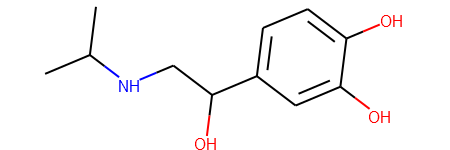

In [114]:
#Check if the number of rings match
ligandm_database[12]


In [115]:
#Average number of rings
sum(ligand_rings)/len(ligandm_database)

3.567378252168112